In [1]:
import pandas as pd
import numpy as np
import html5lib
from matplotlib import dates
from statsmodels.tsa.filters.hp_filter import hpfilter
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)


In [2]:
#this part reads the table from the web
import urllib.request as request
import csv
r = request.urlopen('https://raw.githubusercontent.com/RamiKrispin/coronavirus-csv/master/coronavirus_dataset.csv').read().decode('utf8').split("\n")
reader = csv.reader(r)
A=[]
for line in reader:
    A.append(line)

In [3]:
# give in the country
Country = 'Germany'

In [4]:
#making the dataframe with column names
df = pd.DataFrame(A[1:],columns=A[0])

In [5]:
#converting the cases from object to numeric
df['cases'] = pd.to_numeric(df['cases'])

In [6]:
df['date']=pd.to_datetime(df['date'])
df = df.set_index(df['date'])
df.drop(['date'],axis=1,inplace=True)
#df.head()

In [7]:
df2 = df.groupby([df.index, 'type', 'Country.Region']).agg({'cases': ['sum']})
df2.columns = ['cases']
df2 = df2.reset_index()
df2 = df2.set_index(df2['date'])
df2.drop(['date'],axis=1,inplace=True)

In [8]:
df2.columns

Index(['type', 'Country.Region', 'cases'], dtype='object')

In [9]:
df3 = df2[(df2['Country.Region']==Country) & (df2['type']=='confirmed')]['cases'].cumsum()

In [10]:
y = df3
x = range(len(y))

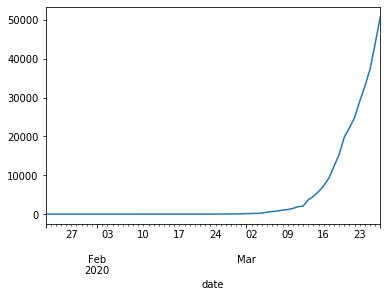

In [11]:
y.plot()

In [12]:
import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a **(x-b) + c

yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn)

In [13]:
popt

array([   1.17510248,   -2.40931251, -378.40137802])

In [14]:
pcov

array([[1.66509957e-05, 5.75208910e-03, 2.89733283e-01],
       [5.75208910e-03, 1.99123355e+00, 1.03713040e+02],
       [2.89733283e-01, 1.03713040e+02, 2.17678937e+04]])

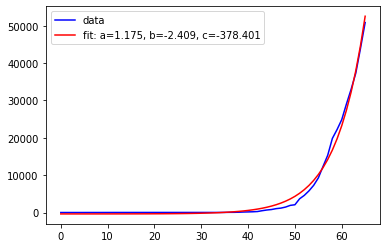

In [15]:
plt.plot(x, y, 'b-', label='data')
plt.plot(x, func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()